
# **Credit Card Customer Clustering**<br>
**Problems<br>**

Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

------

### Query SQL

SELECT *

from `ftds-hacktiv8-project.phase1_assignments.credit-card-information`

where mod(CUST_ID,2) <> 0;

----
----

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering, SpectralClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer

Proses import pustaka yang akan digunakan pada analisis ini

In [2]:
data = pd.read_csv('h8dsft_P1G4_reynaldimarchiano.csv')
df = data.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


Load data dan menyimpan ke dalam variabel df

In [3]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


Tail dari dataset yang berjumlah 4475 row

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Info diatas berisi tipe data dari semua kolom, dan bisa disimpulkan kalau tidak ada nilai Null pada data.

----

## EDA

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


----

### > Bagaimana sebaran data ONEOFF_PURCHASES dan INSTALLMENTS_PURCHASES ?

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Amount')

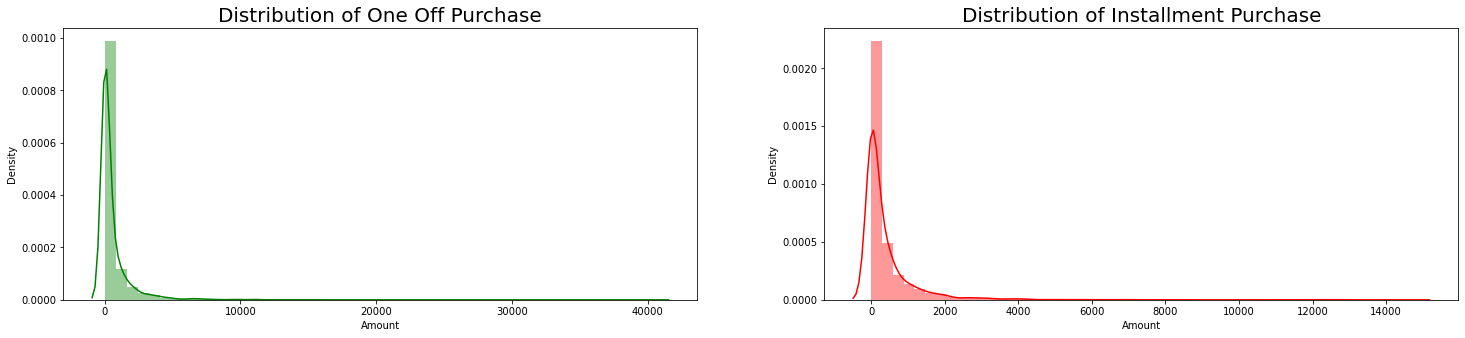

In [6]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.distplot(df['ONEOFF_PURCHASES'],color='green')
plt.title('Distribution of One Off Purchase', fontsize = 20)
plt.xlabel('Amount')


plt.subplot(1,2,2)
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 20)
plt.xlabel('Amount')

Berdasarkan distribusi One OFF Purchase dan Installment Purchase terlihat sebarannya banyak yang range 0-1000, bisa jadi cluster terbanyak nanti ada di sekitar range nilai tersebut.

### > Bagaimana hubungan data PURCHASES, BALANCE, ONEOFF_PURCHASES, dan INSTALLMENTS_PURCHASES terhadap CREDIT_LIMIT ?

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anacond

Text(0, 0.5, 'Credit limit')

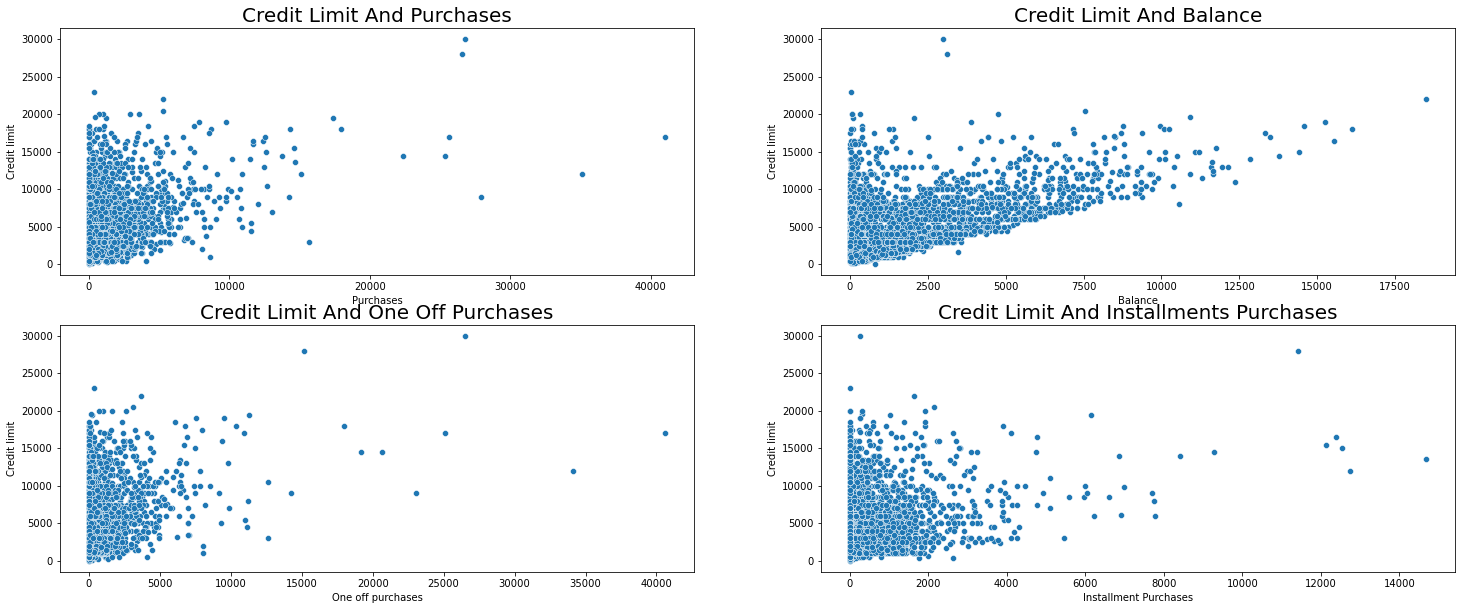

In [7]:
plt.rcParams['figure.figsize'] = (25,10)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Purchases', fontsize =20)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And One Off Purchases', fontsize =20)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Installments Purchases', fontsize =20)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

Dari 4 scatter plot di atas terlihat juga kalau ada kumpulan di nilai 0-2000, ada juga nilai yang paling tinggi di range 10000 ke atas.

----

### Bagaimana sebaran data semua kolom numerik?

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

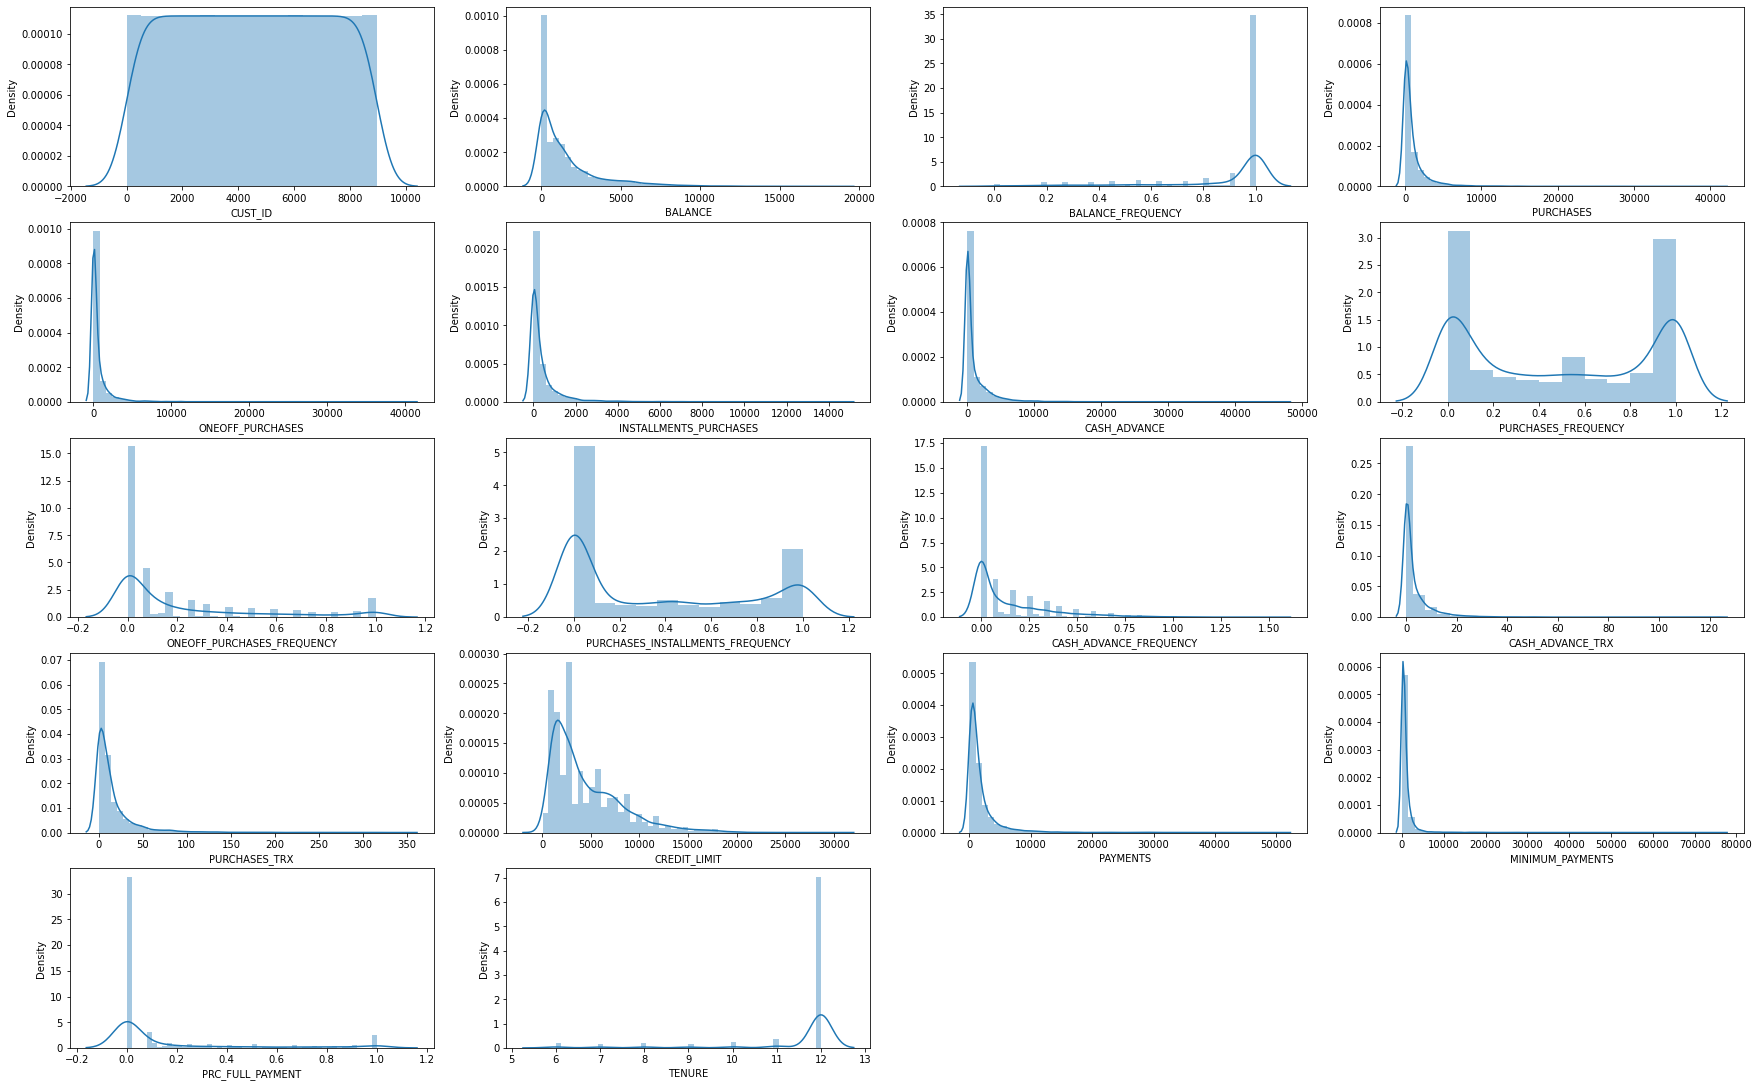

In [8]:
plt.figure(figsize=(30,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 4, i+1)
        sns.distplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

- Dari plot sebaran data-data di atas terlihat banyak sebaran di nilai renda 0-1000.<br>
- Untuk kolom yang berisi frequency sepertinya ada cluster di nilai 0.0 dan 1.0.<br>

-----

## DATA PREPROCESSING

In [9]:
df.drop(['CUST_ID'], axis=1, inplace=True)

Drop kolom CUST_ID karena nilai-nilainya unik dan tidak bisa digunakan dalam pembuatan model.

In [10]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


Tampilan dataset setelah drop kolom.

-----

## Inference

In [11]:
# get data for model inference
df_inf = df.sample(20, random_state=22)
df_inf.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1025,12.039121,1.000000,274.98,0.00,274.98,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,310.575541,NaN,0.00,6
3191,1670.918981,1.000000,1543.83,1406.33,137.50,899.326582,1.000000,1.000000,0.250000,0.083333,2,32,7000.0,757.409319,370.391890,0.00,12
1666,299.765294,1.000000,2352.20,1136.70,1215.50,0.000000,0.916667,0.666667,0.750000,0.000000,0,30,6500.0,2671.279796,185.468819,0.25,12
1898,303.054817,0.636364,894.40,609.40,285.00,0.000000,0.636364,0.363636,0.454545,0.000000,0,12,4000.0,183.620398,128.251550,0.00,11
3574,3011.469977,1.000000,582.28,0.00,582.28,3325.302419,1.000000,0.000000,1.000000,0.333333,8,14,6500.0,2975.129814,1001.234058,0.00,12


Mengambil 10 data inference untuk nantinya diuji coba terhadap model yang sudah dibuat.

In [12]:
df_cek = df.drop(df_inf.index)
df_cek

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


Data yang telah dipisahkan dari 10 data inference disimpan dalam variabel df_train_test

In [13]:
# reset index
df_cek.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,12.039121,1.000000,274.98,0.00,274.98,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,310.575541,NaN,0.000000,6
1,1670.918981,1.000000,1543.83,1406.33,137.50,899.326582,1.000000,1.000000,0.250000,0.083333,2,32,7000.0,757.409319,370.391890,0.000000,12
2,299.765294,1.000000,2352.20,1136.70,1215.50,0.000000,0.916667,0.666667,0.750000,0.000000,0,30,6500.0,2671.279796,185.468819,0.250000,12
3,303.054817,0.636364,894.40,609.40,285.00,0.000000,0.636364,0.363636,0.454545,0.000000,0,12,4000.0,183.620398,128.251550,0.000000,11
4,3011.469977,1.000000,582.28,0.00,582.28,3325.302419,1.000000,0.000000,1.000000,0.333333,8,14,6500.0,2975.129814,1001.234058,0.000000,12
5,626.342256,1.000000,956.64,360.00,596.64,0.000000,0.454545,0.090909,0.363636,0.000000,0,8,7500.0,2125.953394,222.366993,0.000000,11
6,792.349098,0.555556,0.00,0.00,0.00,1795.077768,0.000000,0.000000,0.000000,0.444444,13,0,2000.0,219.603033,286.451636,0.000000,9
7,24.818476,0.909091,390.05,44.90,345.15,0.000000,0.833333,0.083333,0.750000,0.000000,0,11,1000.0,423.338628,117.838976,0.272727,12
8,9264.786223,1.000000,0.00,0.00,0.00,4158.612620,0.000000,0.000000,0.000000,0.333333,5,0,9500.0,2535.922657,2245.846623,0.000000,12
9,2866.054641,1.000000,0.00,0.00,0.00,236.955668,0.000000,0.000000,0.000000,0.250000,4,0,3000.0,714.738754,799.591816,0.000000,12


Reset index dari kedua dataframe yang telah dipisahkan.

----

## Handling Missing Values

In [14]:
cat_col = df_cek.select_dtypes(include=['object']).columns
num_col = df_cek.select_dtypes(exclude=['object']).columns
print('Numeric Columns:', num_col)
print('categorical Columns:', cat_col)

Numeric Columns: Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
categorical Columns: Index([], dtype='object')


Pengelompokan kolom numerik dan kategorik. Tidak ada kolom kategorik.

In [15]:
df_cek.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    154
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Pemeriksaan nilai null pada setiap kolom.

In [16]:
df_cek['MINIMUM_PAYMENTS'].fillna(df_cek['MINIMUM_PAYMENTS'].median(), inplace=True)

Mengisi nilai null pada kolom minimum payments dengan nilai median karena distribusi tidak normal

In [17]:
df_cek.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sudah tidak ada nilai null pada dataset.

----

## Handling Outliers

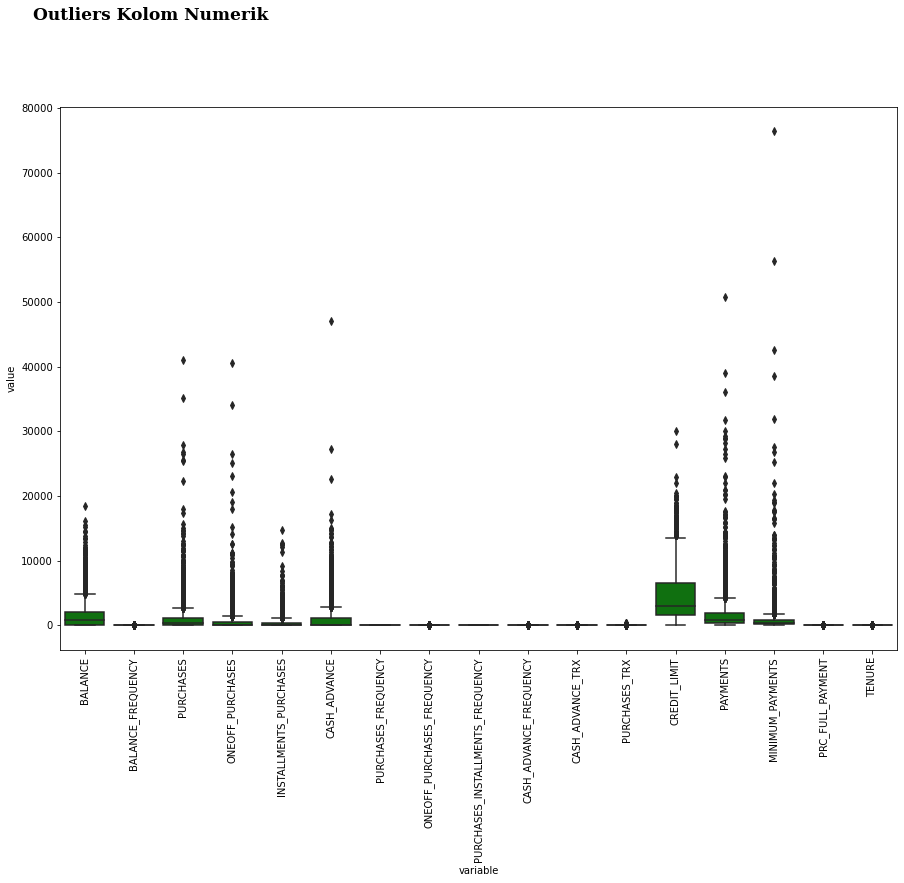

In [18]:
NumericData = df_cek[[feature for feature in num_col if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Outliers Kolom Numerik", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['g']*len(num_col))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

Plotting barplot untuk melihat outliers pada setiap kolom.

In [19]:
outlier_percentage = {}
for feature in num_col:
    tempData = df_cek.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'BALANCE': 8.1,
 'BALANCE_FREQUENCY': 16.72,
 'PURCHASES': 9.47,
 'ONEOFF_PURCHASES': 11.72,
 'INSTALLMENTS_PURCHASES': 9.85,
 'CASH_ADVANCE': 11.31,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 12.44,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 3.86,
 'CASH_ADVANCE_TRX': 8.96,
 'PURCHASES_TRX': 8.98,
 'CREDIT_LIMIT': 2.69,
 'PAYMENTS': 9.27,
 'MINIMUM_PAYMENTS': 10.68,
 'PRC_FULL_PAYMENT': 17.89,
 'TENURE': 15.58}

Melihat persentase outliers pada setiap kolom.

In [20]:
# multicollinearity check
vif_df_cek = pd.DataFrame()
vif_df_cek['Feature'] = df_cek.columns
vif_df_cek['VIF'] = [variance_inflation_factor(df_cek.values, i) 
                 for i in range(len(df_cek.columns))]

vif_df_cek.sort_values('VIF', ascending=False)

,Feature,VIF
2,PURCHASES,54291.159735
3,ONEOFF_PURCHASES,31963.480679
4,INSTALLMENTS_PURCHASES,9709.101297
6,PURCHASES_FREQUENCY,26.560401
1,BALANCE_FREQUENCY,17.839132
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.182410
16,TENURE,16.265849
7,ONEOFF_PURCHASES_FREQUENCY,5.648673
9,CASH_ADVANCE_FREQUENCY,4.790138
12,CREDIT_LIMIT,4.589180


Perhitungan nilai VIF sebelum dihandling outliers.

In [21]:
# capping the outlier using winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='right', fold=3)
df_capped= winsorizer.fit_transform(df_cek)

Handling outliers menggunakan metode Winsorizer.

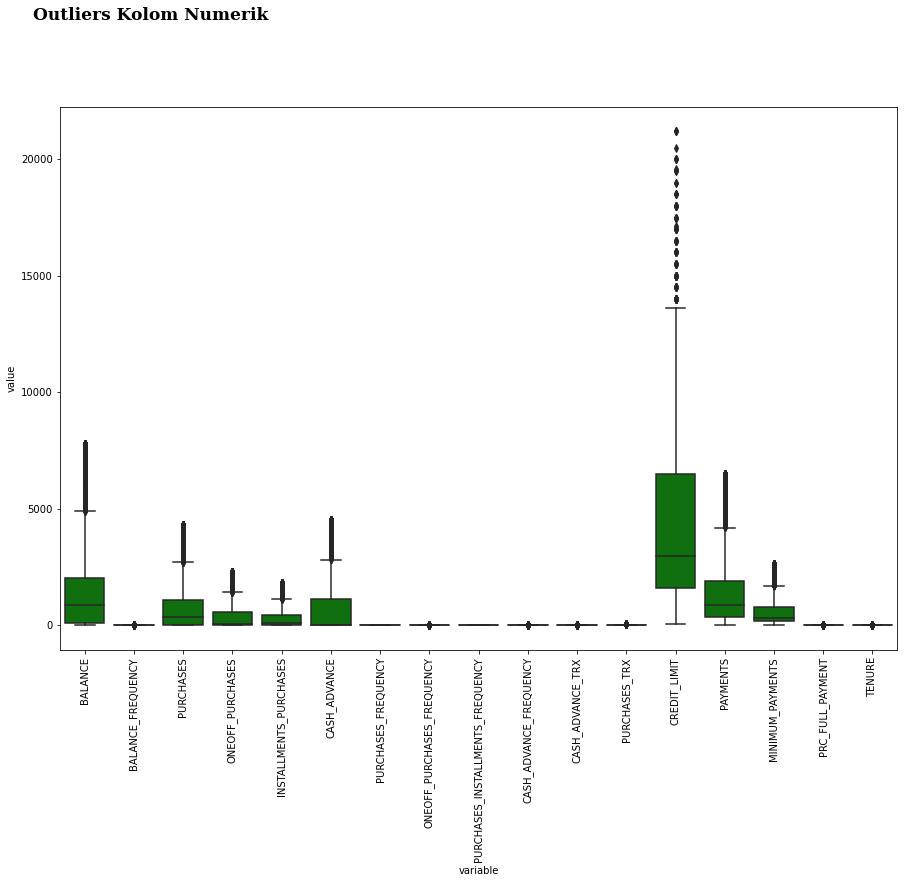

In [22]:
NumericData2 = df_capped[[feature for feature in num_col if feature not in []]]
NumericMelt2 = NumericData2.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Outliers Kolom Numerik", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt2, palette=['g']*len(num_col))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

Visualisasi barplot setelah handling outliers.

In [23]:
# multicollinearity check
vif_dfcapped = pd.DataFrame()
vif_dfcapped['Feature'] = df_capped.columns
vif_dfcapped['VIF'] = [variance_inflation_factor(df_capped.values, i) 
                 for i in range(len(df_capped.columns))]

vif_dfcapped.sort_values('VIF', ascending=False)

,Feature,VIF
2,PURCHASES,30.756146
6,PURCHASES_FREQUENCY,27.790363
8,PURCHASES_INSTALLMENTS_FREQUENCY,22.338638
1,BALANCE_FREQUENCY,18.012288
3,ONEOFF_PURCHASES,16.963601
16,TENURE,16.699352
4,INSTALLMENTS_PURCHASES,10.400060
10,CASH_ADVANCE_TRX,9.552175
9,CASH_ADVANCE_FREQUENCY,9.437816
11,PURCHASES_TRX,9.077709


Perhitungan VIF setelah handling outliers. Ada 4 kolom yang nilainya dibawah 5, maka dataset ini bisa direduksi sampai 12 kolom.

----

## Feature Scaling

In [24]:
df_capped.skew()

BALANCE                             1.712991
BALANCE_FREQUENCY                  -2.024033
PURCHASES                           1.787788
ONEOFF_PURCHASES                    1.706366
INSTALLMENTS_PURCHASES              1.752585
CASH_ADVANCE                        1.669798
PURCHASES_FREQUENCY                 0.059849
ONEOFF_PURCHASES_FREQUENCY          1.548322
PURCHASES_INSTALLMENTS_FREQUENCY    0.509816
CASH_ADVANCE_FREQUENCY              1.771780
CASH_ADVANCE_TRX                    1.794948
PURCHASES_TRX                       1.738595
CREDIT_LIMIT                        1.424548
PAYMENTS                            1.724673
MINIMUM_PAYMENTS                    1.691255
PRC_FULL_PAYMENT                    1.437052
TENURE                             -2.953878
dtype: float64

Nilai skewness diatas mendeskripsikan kalau distribusi setiap kolom tidak normal maka untuk scaling menggunakan MinMaxScaler

In [25]:
num_scaler=MinMaxScaler()
df_capped_scaled=num_scaler.fit_transform(df_capped)
df_capped_scaled

array([[4.91669366e-04, 1.25000000e-01, 1.04645565e-02, ...,
        1.18899669e-01, 0.00000000e+00, 3.33333333e-01],
       [0.00000000e+00, 0.00000000e+00, 4.09350198e-02, ...,
        1.18899669e-01, 0.00000000e+00, 3.33333333e-01],
       [9.72215139e-02, 8.75000000e-01, 3.66026933e-02, ...,
        1.00000000e+00, 0.00000000e+00, 3.33333333e-01],
       ...,
       [1.69673359e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.18817187e-01, 0.00000000e+00, 8.33333333e-01],
       [1.36012716e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.05237946e-01, 0.00000000e+00, 8.33333333e-01],
       [4.42221233e-01, 1.00000000e+00, 4.76718687e-02, ...,
        3.10635041e-01, 0.00000000e+00, 8.33333333e-01]])

Proses fit transform dengan MinMaxScaler

In [26]:
# from sklearn.decomposition import PCA
pca_scaled=PCA(n_components=17).fit(df_capped_scaled)
pca_scaled.explained_variance_ratio_

array([0.36817115, 0.19801827, 0.11157737, 0.08319018, 0.04865082,
       0.04233196, 0.03227429, 0.02826073, 0.02074748, 0.01672811,
       0.01484868, 0.01184756, 0.00912925, 0.00563549, 0.00399911,
       0.00303426, 0.00155529])

PCA menggunakan n_components 17 sesuai jumlah kolom

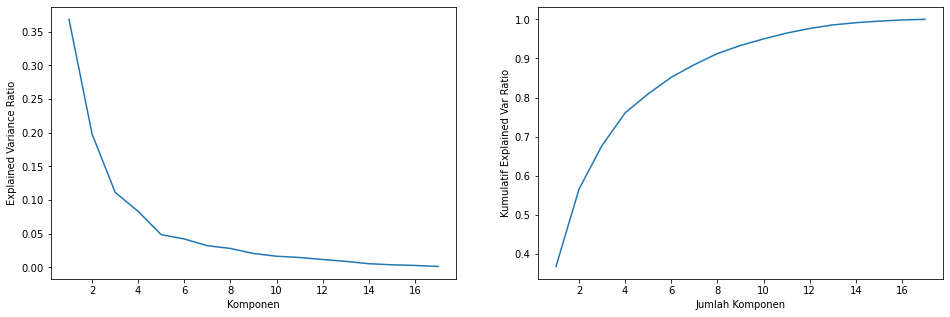

In [27]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,18),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

Ada patahan di nilai 5 atau 7, 95% ada di k=11

In [28]:
pca_prep = PCA(n_components=0.95).fit(df_capped_scaled)
pca_prep.n_components_

11

Reduksi kolom sampai dengan 11

In [29]:
df_inf['MINIMUM_PAYMENTS'].fillna(df_inf['MINIMUM_PAYMENTS'].median(), inplace=True)

Mengisi nilai null di df_inf

In [30]:
df_capped_scaled_pca = pca_prep.transform(df_capped_scaled)
df_inf_pca = pca_prep.transform(df_inf)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Proses transform pada df dan df_inf

-----

## MODEL TRAINING

In [31]:
kmeans = [KMeans(n_clusters=k,random_state=22).fit(df_capped_scaled_pca) for k in range(1, 12)]

Pembuatan model Kmeans, SpectralClustering, dan Agglomerative.

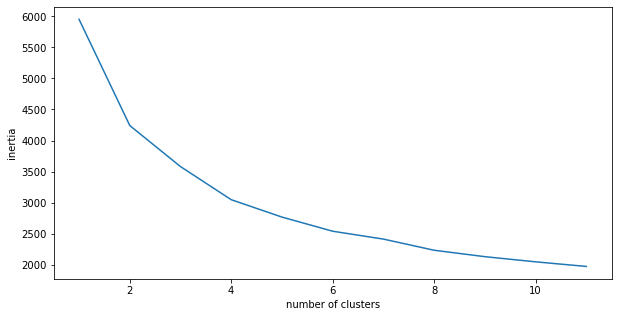

In [32]:
# Inertia: Sum of distances of samples to their closest cluster center
inertia = [model.inertia_ for model in kmeans]

plt.figure(figsize=(10, 5))
plt.plot(range(1, 12), inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

Berdasarkan inertia ada patahan di 2, 4 dan 6.

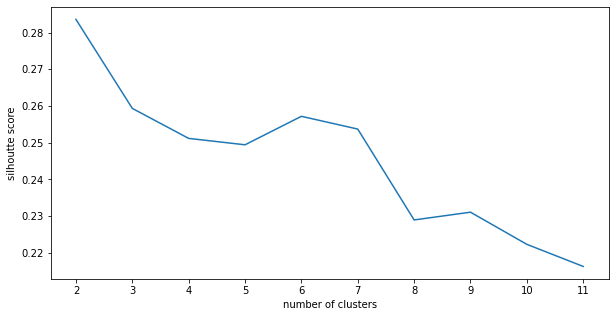

In [33]:
silhouette_scr = [silhouette_score(df_capped_scaled_pca, model.labels_) for model in kmeans[1:]]

plt.figure(figsize=(10, 5))
plt.plot(range(2,12), silhouette_scr)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9,10,11])
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.show()

Dipilih nilai 2 karena yang paling tinggi dibanding yang lain.

In [34]:
kmeans_fix = KMeans(n_clusters=2, random_state=22)
kmeans_fit = kmeans_fix.fit(df_capped_scaled_pca)
kmeans_labels = kmeans_fit.labels_

print('kmeans label distribution')
print(np.array(np.unique(kmeans_labels, return_counts=True)).T)

kmeans label distribution
[[   0 2482]
 [   1 1973]]


Proses pembuatan cluster dengan model Kmeans.

In [35]:
sc = SpectralClustering(n_clusters=2, gamma=2, random_state=22, n_jobs=-1)
ag = AgglomerativeClustering(n_clusters=2, linkage='ward')

Pembuatan model cluster lainnya menggunakan Spectral Clustering dan Agglomerative Clustering.

In [36]:
sc_fit = sc.fit(df_capped_scaled_pca)
sc_labels = sc_fit.labels_

print('spectral clustering label distribution')
print(np.array(np.unique(sc_labels, return_counts=True)).T)

spectral clustering label distribution
[[   0 3803]
 [   1  652]]


Hasil clustering dengan Spectral sebanyak 2 cluster

In [37]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
ac.fit(df_capped_scaled_pca)
ac_labels = ac.labels_

print('gaussian label distribution')
print(np.array(np.unique(df_capped_scaled_pca, return_counts=True)).T)

gaussian label distribution
[[-1.14057348  1.        ]
 [-1.09817775  1.        ]
 [-1.08049219  1.        ]
 ...
 [ 2.05228504  1.        ]
 [ 2.09652835  1.        ]
 [ 2.16846517  1.        ]]


Hasil clustering dengan Agglomerative sebanyak 2 cluster

In [38]:
print('Silhouette Score\n-----------------')
print('Kmeans                   :', silhouette_score(df_capped_scaled_pca, kmeans_labels))
print('Spectral Clustering      :', silhouette_score(df_capped_scaled_pca, sc_labels))
print('Agglomerative Clustering :', silhouette_score(df_capped_scaled_pca, ac_labels))

Silhouette Score
-----------------
Kmeans                   : 0.28361489451549854
Spectral Clustering      : 0.32040150676507617
Agglomerative Clustering : 0.36075628768753965


Berdasarkan skor silhouette yang terbaik adalah spectral clustering.

--------

## MODEL EVALUATION

In [39]:
pca_plot = PCA(n_components=2)
pca_plot_data = pca_plot.fit_transform(df_capped_scaled_pca)
pca_plot_df = pd.DataFrame.from_records(data=pca_plot_data, columns=['x1','x2'])
pca_plot_df['kmeans_cluster'] = kmeans_labels + 1
pca_plot_df['sc_cluster'] = sc_labels + 1
pca_plot_df['ac_cluster'] = ac_labels + 1

Proses PCA ulang untuk melihat visualisasi hasil cluster dalam ruang dua dimensi.

In [40]:
df_cek_cluster = pd.concat([df_capped, pca_plot_df], axis=1)
df_cek_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,x1,x2,kmeans_cluster,sc_cluster,ac_cluster
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,...,500.0,0.000000,313.052687,0.0,8.0,-0.673748,-0.563707,1,1,1
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,...,7000.0,0.000000,313.052687,0.0,8.0,-0.644308,-0.520809,1,1,1
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,...,1200.0,1494.480376,2632.772690,0.0,8.0,-0.562023,0.021112,1,1,1
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,...,1200.0,3029.380326,85.428885,0.0,8.0,-0.402763,-0.259821,1,1,1
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,...,1000.0,215.316424,137.846006,0.0,8.0,-0.507812,-0.334134,1,1,1


Penggabungan hasil clustering ke dalam dataset.

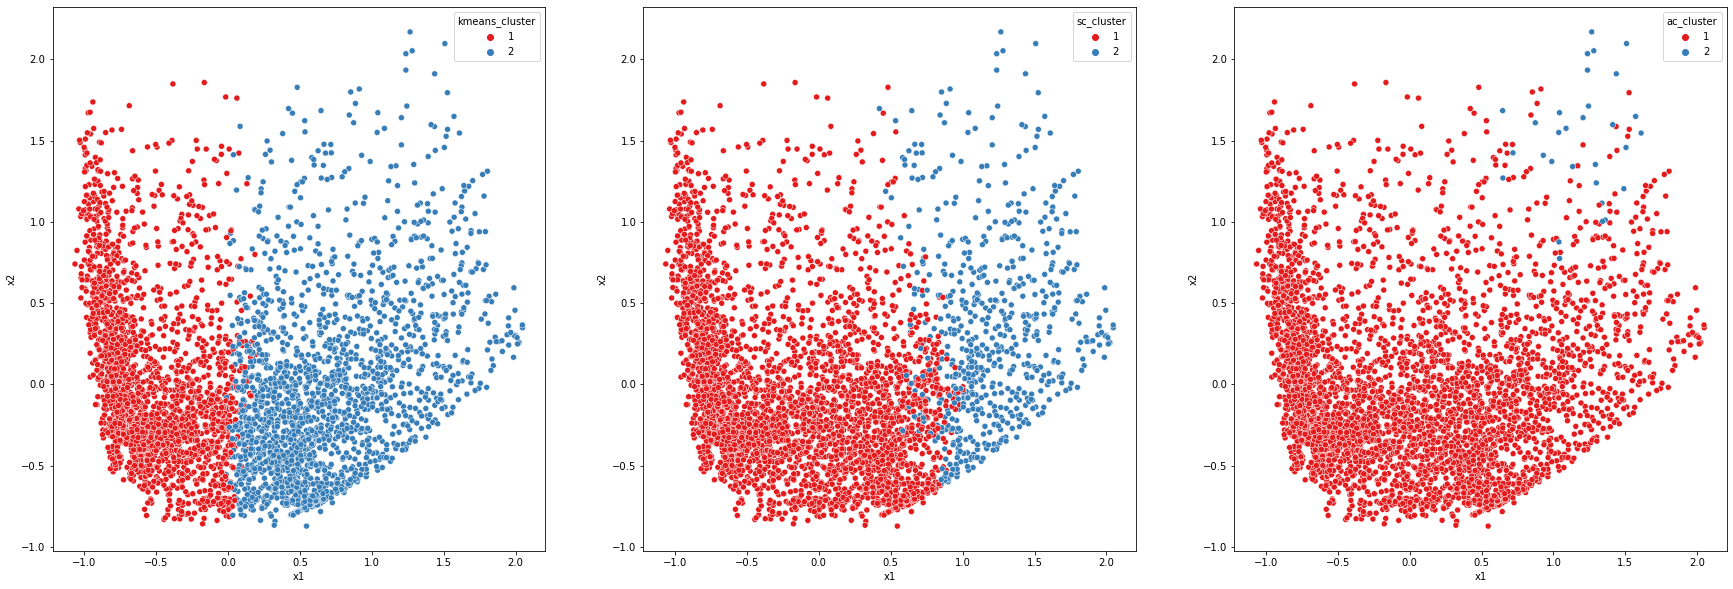

In [41]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
sns.scatterplot(x='x1', y='x2', hue='kmeans_cluster', data=df_cek_cluster, palette='Set1')

plt.subplot(1, 3, 2)
sns.scatterplot(x='x1', y='x2', hue='sc_cluster', data=df_cek_cluster, palette='Set1')

plt.subplot(1, 3, 3)
sns.scatterplot(x='x1', y='x2', hue='ac_cluster', data=df_cek_cluster, palette='Set1')

plt.show()

Berdasarkan scatterplot sesuai dengan silhouette score yang tidak terlalu bagus terlihat masih banyak yang overlap pada ketiga model tersebut. Untuk model Kmeans terlihat dibagi di tengah data, sedangkan pembagian cluster di Spectral ada di 3/4 data. Untuk di agglomerative terlihat kurang jelas clusteringnya.

[Text(0, 0, '4231'),
 Text(1, 0, '4353'),
 Text(2, 0, '3170'),
 Text(3, 0, '601'),
 Text(4, 0, '603'),
 Text(5, 0, '958'),
 Text(6, 0, '3163'),
 Text(7, 0, '609'),
 Text(8, 0, '2137'),
 Text(9, 0, '1650'),
 Text(10, 0, '4230'),
 Text(11, 0, '216'),
 Text(12, 0, '3157'),
 Text(13, 0, '210'),
 Text(14, 0, '1647'),
 Text(15, 0, '616'),
 Text(16, 0, '3172'),
 Text(17, 0, '232'),
 Text(18, 0, '1833'),
 Text(19, 0, '1667'),
 Text(20, 0, '3193'),
 Text(21, 0, '262'),
 Text(22, 0, '560'),
 Text(23, 0, '257'),
 Text(24, 0, '994'),
 Text(25, 0, '568'),
 Text(26, 0, '572'),
 Text(27, 0, '3558'),
 Text(28, 0, '573'),
 Text(29, 0, '986'),
 Text(30, 0, '1661'),
 Text(31, 0, '3564'),
 Text(32, 0, '586'),
 Text(33, 0, '4080'),
 Text(34, 0, '2128'),
 Text(35, 0, '623'),
 Text(36, 0, '628'),
 Text(37, 0, '667'),
 Text(38, 0, '4042'),
 Text(39, 0, '2114'),
 Text(40, 0, '935'),
 Text(41, 0, '2494'),
 Text(42, 0, '664'),
 Text(43, 0, '3546'),
 Text(44, 0, '668'),
 Text(45, 0, '629'),
 Text(46, 0, '672'),
 

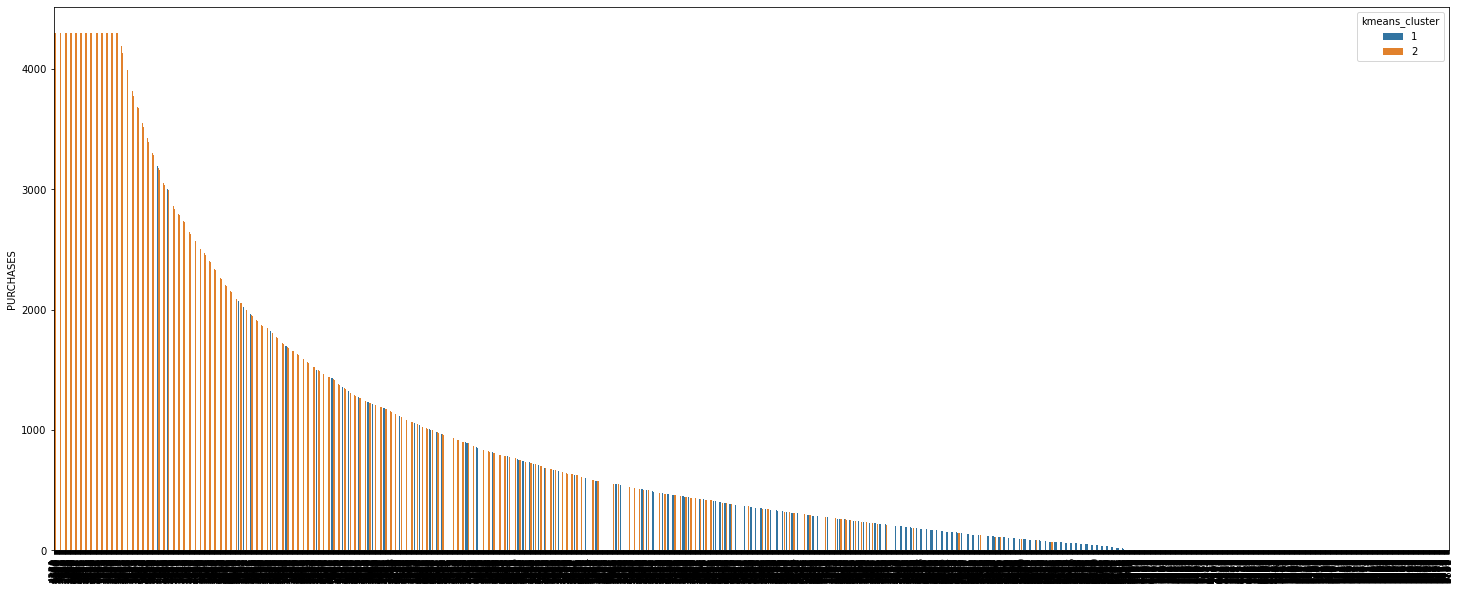

In [42]:
plt.figure(figsize=(25,10))
fig6= sns.barplot(data=df_cek_cluster, x=df_cek_cluster.index, y='PURCHASES',hue='kmeans_cluster',order=df_cek_cluster.PURCHASES.sort_values(ascending=False).index)
fig6.set_xticklabels(fig6.get_xticklabels(),rotation = 90)

Clustering berdasarkan purchases bisa kita lihat kalau pembagian cluster sampai di nilai 1000. Nilai 0-1000 adalah cluster 1.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anacond

Text(0, 0.5, 'Credit limit')

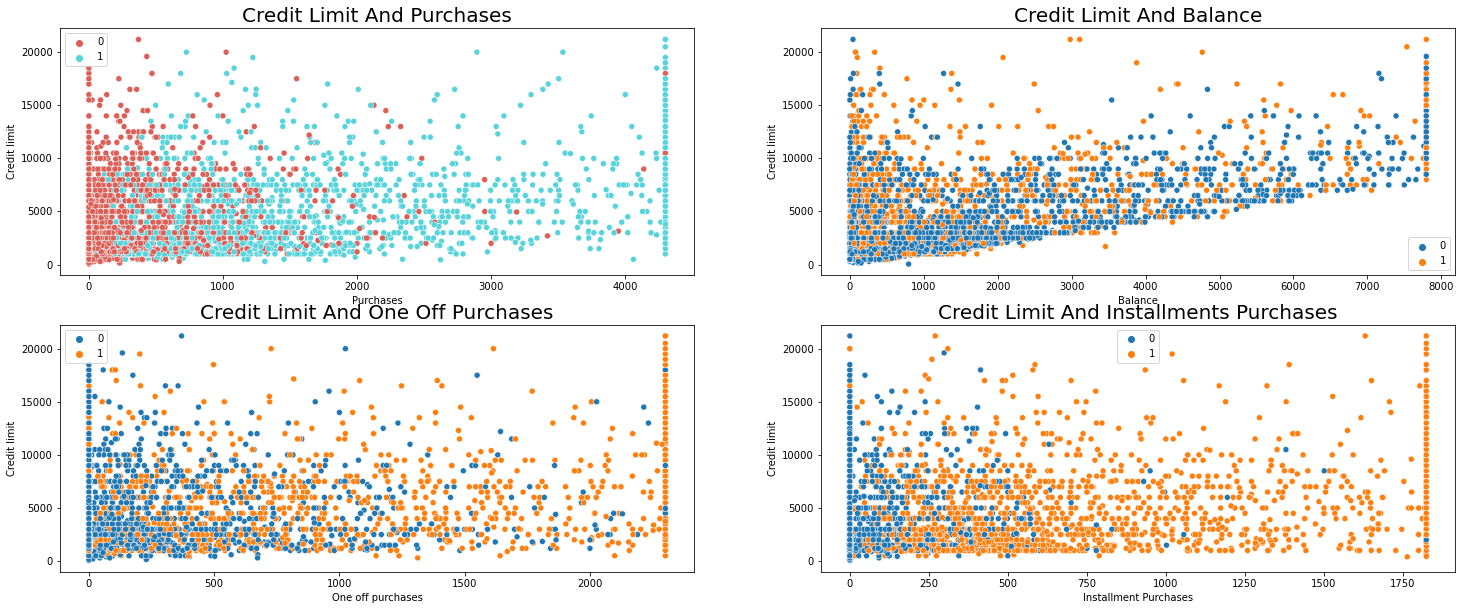

In [43]:
plt.rcParams['figure.figsize'] = (25,10)

plt.subplot(2,2,1)
sns.scatterplot(df_cek_cluster['PURCHASES'],df_cek_cluster['CREDIT_LIMIT'],hue=kmeans_labels,palette=sns.color_palette('hls',2))
plt.title('Credit Limit And Purchases', fontsize =20)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df_cek_cluster['BALANCE'],df_cek_cluster['CREDIT_LIMIT'],hue=kmeans_labels)
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df_cek_cluster['ONEOFF_PURCHASES'],df_cek_cluster['CREDIT_LIMIT'],hue=kmeans_labels)
plt.title('Credit Limit And One Off Purchases', fontsize =20)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df_cek_cluster['INSTALLMENTS_PURCHASES'],df_cek_cluster['CREDIT_LIMIT'],hue=kmeans_labels)
plt.title('Credit Limit And Installments Purchases', fontsize =20)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

- Berdasarkan hubungan data diatas clustering diasumsikan kalau cluster 0 berada pada range 0-500 untuk Purchases, One OFF Purchases, Installment Purchases.
- Di kolom balance kurang jelas clusteringnya karena banyak sekali overlap

-----

## Model Inference

In [44]:
kmeans_fix = KMeans(n_clusters=2, random_state=22)
kmeans_fit_inf = kmeans_fix.fit(df_inf_pca)
kmeans_labels_inf = kmeans_fit_inf.labels_

print('Kmeans Label Distribution')
print(np.array(np.unique(kmeans_labels_inf, return_counts=True)).T)

Kmeans Label Distribution
[[ 0  3]
 [ 1 17]]


Fit pada data inference dengan kmeans

In [45]:
sc_fit_inf = sc.fit(df_inf_pca)
sc_labels_inf = sc_fit.labels_

print('spectral clustering label distribution')
print(np.array(np.unique(sc_labels_inf, return_counts=True)).T)

spectral clustering label distribution
[[ 0 16]
 [ 1  4]]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Fit data inference dengan spectral.

In [46]:
pca_plot = PCA(n_components=2)
pca_plot_df_inf = pca_plot.fit_transform(df_inf_pca)
pca_plot_df_inf = pd.DataFrame.from_records(data=pca_plot_df_inf, columns=['x1','x2'])
pca_plot_df_inf['kmeans_cluster'] = kmeans_labels_inf + 1
pca_plot_df_inf['sc_cluster'] = sc_labels_inf + 1

Proses PCA ulang untuk melihat visualisasi hasil cluster dalam ruang dua dimensi.

In [47]:
df_inf_cluster = pd.concat([df_inf, pca_plot_df_inf], axis=1)
df_inf_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,x1,x2,kmeans_cluster,sc_cluster
0,12.039121,1.000000,274.98,0.00,274.98,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1500.0,310.575541,489.750966,0.00,6,-4449.041076,-217.781793,2,1
1,1670.918981,1.000000,1543.83,1406.33,137.50,899.326582,1.000000,1.000000,0.250000,0.083333,...,32,7000.0,757.409319,370.391890,0.00,12,388.490615,-1483.429784,2,2
2,299.765294,1.000000,2352.20,1136.70,1215.50,0.000000,0.916667,0.666667,0.750000,0.000000,...,30,6500.0,2671.279796,185.468819,0.25,12,-1033.642807,-25.691930,2,2
3,303.054817,0.636364,894.40,609.40,285.00,0.000000,0.636364,0.363636,0.454545,0.000000,...,12,4000.0,183.620398,128.251550,0.00,11,-2797.158664,-1124.802569,2,1
4,3011.469977,1.000000,582.28,0.00,582.28,3325.302419,1.000000,0.000000,1.000000,0.333333,...,14,6500.0,2975.129814,1001.234058,0.00,12,2320.507557,1489.666708,2,1


Penggabungan hasil clustering ke dalam dataset.

<AxesSubplot:xlabel='x1', ylabel='x2'>

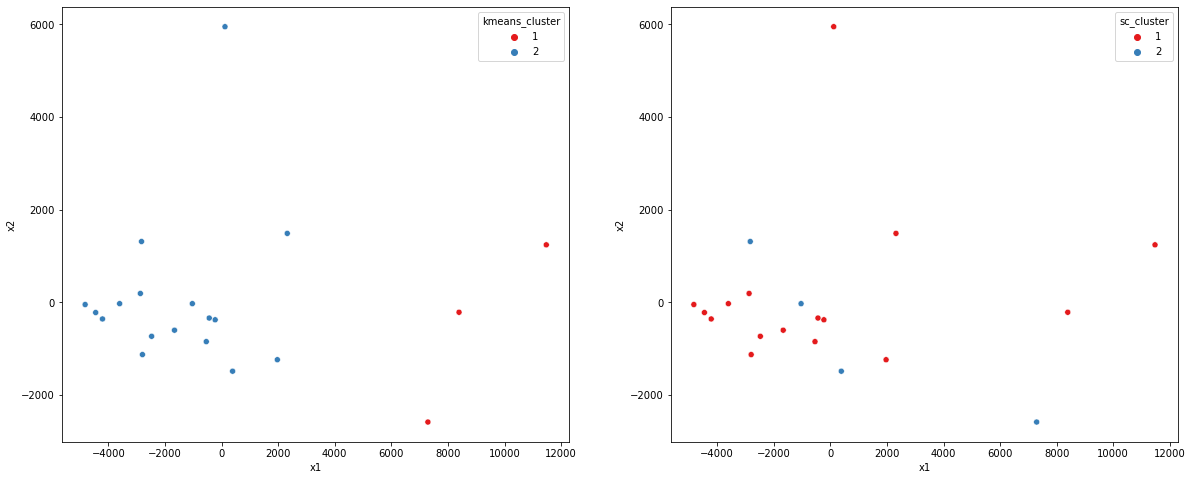

In [48]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='x1', y='x2', hue='kmeans_cluster', data=df_inf_cluster, palette='Set1')

plt.subplot(1, 2, 2)
sns.scatterplot(x='x1', y='x2', hue='sc_cluster', data=df_inf_cluster, palette='Set1')

Data inference ternyata lebih cocok menggunakan Kmeans dibanding Spectral walaupun pada model training bukan jadi model yang terbaik.

----

Jawab pertanyaan berikut:

- Apakah yang dimaksud dengan inertia pada algoritma K-Means ?<br>
**> Nilai total jarak antara tiap titik dengan centroid terdekatnya**

- Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !<br>
**> Elbow method adalah salah satu cara untuk mencari ukuran cluster yang optimal untuk menentukan ukuran cluster terbaik. Menentukan jumlah cluster yang tepat berdarkan nilai SSE (Sum of Square Error) yang mengalami penurunan drastis. Semakin besar nilai SSE, semakin berkurang kualitas cluster, begitu sebaliknya. Semakin kecil nilai SSE, semakin baik kualitas cluster. Elbow Method memiliki keunggulan waktu komputasi lebih efisien, kelemahannya kadang kurang terlihat patahan mana yang menunjukan penurunan nilai drastis, lalu lemah dalam menganalisis persebaran data serta bergantung pada inisialisasi centroid.**<br>

    **> Berikut tahap algoritma metode elbow untuk menentukan nilai k terbaik pada k means**
    1. Inisialisasi nilai k
    2. Mulai
    3. Naikkan nilai k
    4. Hitung hasil SSE setiap nilai k
    5. Amati hasil SSE setiap nilai K yang turun secara drastis
    6. Tentukan nilai k optimal**<br>
<br>



- Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !<br>
    **a. KMeans Clustering bertujuan untuk meminimalisasikan objective function yang diset dalam proses clustering dengan cara meminimalkan variasi antar data yang ada di dalam suatu cluster dan  memaksimalkan variasi dengan data yang ada di cluster lainnya juga bertujuan untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K.**<br>
    **b. Spectral Clustering menggunakan spektrum (eigenvalues) dari matriks Kesamaan untuk melakukan reduksi dimensional sebelum pengelompokan dalam dimensi yang lebih sedikit.<br>**
    **c. Agglomerative clustering merupakan algoritma K-Means Clustering yang dimulai dengan jumlah cluster yang tetap. Algoritma ini menempatkan data ke dalam jumlah cluster yang tepat. Proses aglomerasi dimulai dengan membentuk setiap data sebagai satu cluster. Algoritma ini menggunakan beberapa metode pengukuran jarak, mengurangi satu cluster pada setiap iterasi dengan menggabungkan cluster tersebut dengan cluster lainnya.**

----
----

# KESIMPULAN

Berdasarkan hasil PCA, kolom pada dataset dapat direduksi sampai dengan 11 kolom. Hasil clustering menggunakan metode kmeans, spectral, dan agglomerative sebanyak 2 cluster tidak menghasilkan silhouette yang bagus. Terlihat dari hasil plotting berdasarkan cluster masih ada overlapping. Dari ketiga model tersebut, spectral adalah model dengan silhouette score tertinggi. Spectral terlihat membuat pembagian cluster dari 1/4 yang bernilai tinggi dari setiap kolom. Pada data inference terlihat model spectral kurang cocok dalam clustering karena terlihat masih banyak titik overlap yang susah didefinisikan pembagian clusternya. Model Kmeans lebih cocok pada inference data karena lebih terlihat jelas dan tidak ada overlapping.

-----
----